In [2]:
import pandas as pd

fbi_df = pd.read_csv('fbi_zip_crime_aggregate_withlocation_homeprice_roadconnectivity.csv')

/tmp/ipykernel_1836034/2458273866.py:3: DtypeWarning: Columns (52) have mixed types. Specify dtype option on import or set low_memory=False.
  fbi_df = pd.read_csv('fbi_zip_crime_aggregate_withlocation_homeprice_roadconnectivity.csv')


In [4]:
fbi_df.head()

,zip,Year,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,...,n_blocks,linkNodeRatio,intDensity,strNetDensity,conNodeRatio,blockDensity,avgBlockLength,medBlockLength,gamma,alpha
0,99577,2010,1902.0,17672.0,44.0,312.0,2.0,776.0,3882.0,1986.0,...,367.0,1.122677,3.636781,1642.698,0.486989,1.69809,195.9318,114.6318,0.37469,.0617437
1,99577,2011,1690.0,16744.0,58.0,290.0,2.0,826.0,3676.0,1538.0,...,367.0,1.122677,3.636781,1642.698,0.486989,1.69809,195.9318,114.6318,0.37469,.0617437
2,99577,2012,1906.0,15752.0,44.0,334.0,0.0,1006.0,3042.0,1568.0,...,367.0,1.122677,3.636781,1642.698,0.486989,1.69809,195.9318,114.6318,0.37469,.0617437
3,99577,2013,1578.0,13892.0,28.0,252.0,0.0,804.0,2806.0,1432.0,...,367.0,1.122677,3.636781,1642.698,0.486989,1.69809,195.9318,114.6318,0.37469,.0617437
4,99577,2014,1640.0,13284.0,38.0,294.0,0.0,634.0,2184.0,1136.0,...,367.0,1.122677,3.636781,1642.698,0.486989,1.69809,195.9318,114.6318,0.37469,.0617437


In [35]:
## Get year and home price

year_homeprice_df = fbi_df.loc[:,['Year','Aggravated Assault','All Other Offenses (Except Traffic)','Arson','Burglary',
                                  'Curfew and Loitering Law Violations','Disorderly Conduct','Driving Under the Influence',
                                  'Drug Abuse Violations - Grand Total','HomePrice','zip']]

In [36]:
year_homeprice_df = year_homeprice_df.set_index('Year')

In [37]:
year_homeprice_df.head()

,Aggravated Assault,All Other Offenses (Except Traffic),Arson,Burglary,Curfew and Loitering Law Violations,Disorderly Conduct,Driving Under the Influence,Drug Abuse Violations - Grand Total,HomePrice,zip
Year,,,,,,,,,,
2010,1902.0,17672.0,44.0,312.0,2.0,776.0,3882.0,1986.0,305535.921646,99577
2011,1690.0,16744.0,58.0,290.0,2.0,826.0,3676.0,1538.0,299672.879576,99577
2012,1906.0,15752.0,44.0,334.0,0.0,1006.0,3042.0,1568.0,308434.627689,99577
2013,1578.0,13892.0,28.0,252.0,0.0,804.0,2806.0,1432.0,322664.599919,99577
2014,1640.0,13284.0,38.0,294.0,0.0,634.0,2184.0,1136.0,328469.835862,99577


In [50]:
year_homeprice_df.zip.unique()

array([99577, 99701, 99801, ..., 82730, 82701, 20001])

In [46]:
def plot_homeprice_for_zipcode(zipcode,df):
    year_homeprice_df = df[df['zip']==zipcode]
    year_homeprice_df = year_homeprice_df.loc[:,['HomePrice']]
    year_homeprice_df.plot()
    plt.title("Home Price per year in zipcode "+str(zipcode))
    plt.show()
    
def plot_crime_for_zipcode(zipcode,df):
    year_homeprice_df = df[df['zip']==zipcode]
    year_homeprice_df = year_homeprice_df.loc[:,['Aggravated Assault','All Other Offenses (Except Traffic)','Arson','Burglary',
                                  'Curfew and Loitering Law Violations','Disorderly Conduct','Driving Under the Influence',
                                  'Drug Abuse Violations - Grand Total']]
    year_homeprice_df.plot()
    plt.title("Crime per year in zipcode "+str(zipcode))
    plt.show()
    
    


Input your zipcode 99577


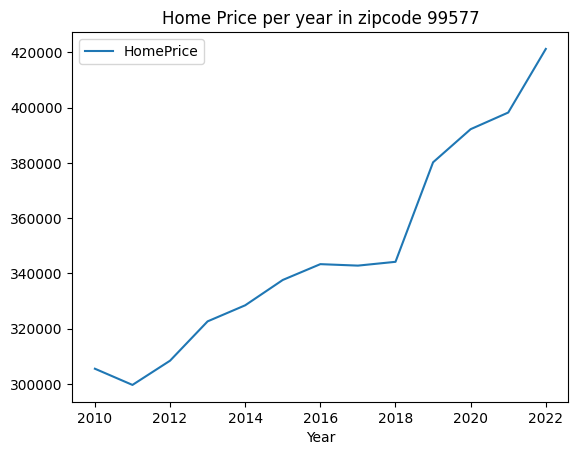

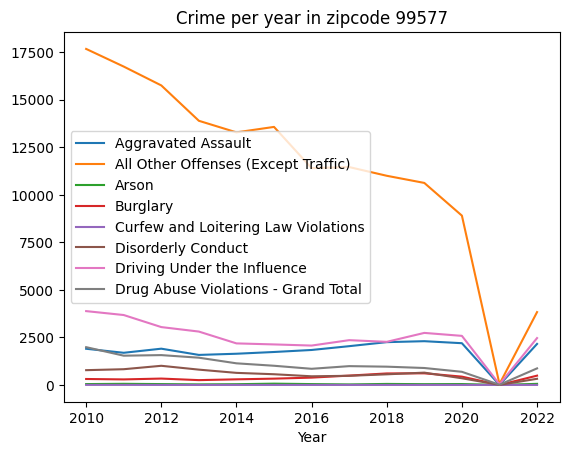

In [47]:
zip_input = input("Input your zipcode")
if int(zip_input) in year_homeprice_df['zip'].values:
    plot_homeprice_for_zipcode(int(zip_input), year_homeprice_df)
    plot_crime_for_zipcode(int(zip_input), year_homeprice_df)
else:
    print("We don't have information about that zipcode")